In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
data=pd.read_csv("dataset_ejemplo_40_3_16.csv",sep=";")

In [104]:
resultado=pd.Categorical(data["estado"])
data["outcome"]=resultado.codes

In [105]:
data["outcome"].head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int8

In [106]:
data["estado"].head()

0    R
1    R
2    R
3    R
4    R
Name: estado, dtype: object

In [107]:
df=data[["outcome","e1","e4","e10"]]
df=df.head(40)

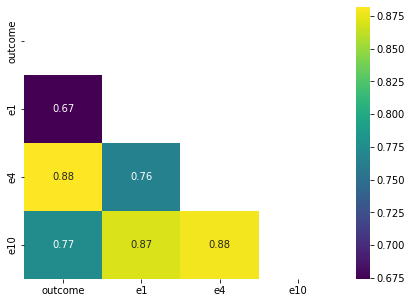

In [108]:
plt.figure(figsize=(7, 5))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [110]:
#frequency table
marginal_table_0 = pd.crosstab(index=df["outcome"], 
                            columns=df["e1"],
                             margins=True)   # Include row and column totals
marginal_table_0

e1,0,1,All
outcome,,,
0,3,5,8
1,8,0,8
All,11,5,16


In [111]:
#likelihood table
marginal_table_1 = pd.crosstab(index=df["outcome"], 
                            columns=df["e1"],
                             margins=True,
                             normalize=True)   # Include row and column totals
marginal_table_1

e1,0,1,All
outcome,,,
0,0.1875,0.3125,0.5
1,0.5000,0.0000,0.5
All,0.6875,0.3125,1.0


In [112]:
marginal_table_2 = pd.crosstab(index=df["outcome"], 
                            columns=df["e4"],
                             margins=True,
                             normalize=True)   # Include row and column totals
marginal_table_2

e4,0,1,All
outcome,,,
0,0.0625,0.4375,0.5
1,0.5000,0.0000,0.5
All,0.5625,0.4375,1.0


In [113]:
marginal_table_3 = pd.crosstab(index=df["outcome"], 
                            columns=df["e10"],
                             margins=True,
                             normalize=True)   # Include row and column totals
marginal_table_3

e10,0,1,All
outcome,,,
0,0.125,0.375,0.5
1,0.500,0.000,0.5
All,0.625,0.375,1.0


In [114]:
X=df[["e1","e4","e10"]]
Y=df[["outcome"]]

In [115]:
model = BernoulliNB()
clf = model.fit(X, Y)
Y_pred = model.predict(X)
print('Classes: ', clf.classes_)
print('Class Log Priors: ',clf.class_log_prior_)
score = model.score(X, Y)
print('Accuracy Score: ', score)
print(classification_report(Y, Y_pred))

Classes:  [0 1]
Class Log Priors:  [-0.69314718 -0.69314718]
Accuracy Score:  0.9375
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de Confusión:
[[7 1]
 [0 8]]


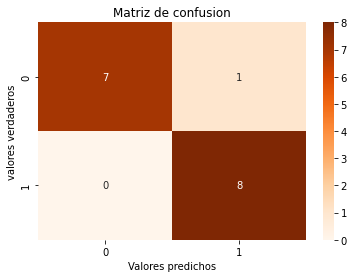

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

matriz = confusion_matrix(Y, Y_pred)
print('Matriz de Confusión:')
print(matriz)
ax= plt.subplot()
sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
ax.set_title('Matriz de confusion'); 

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = BernoulliNB()
clf = model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Classes: ', clf.classes_)
print('Class Log Priors: ',clf.class_log_prior_)
score = model.score(X_test, Y_test)
print('Accuracy Score: ', score)
print(classification_report(Y_test, Y_pred))

Classes:  [0 1]
Class Log Priors:  [-0.69314718 -0.69314718]
Accuracy Score:  0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de Confusión:
[[1 1]
 [0 2]]


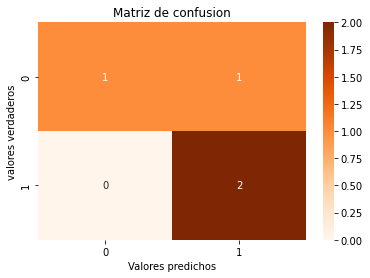

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

matriz = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusión:')
print(matriz)
ax= plt.subplot()
sb.heatmap(matriz, annot=True, ax = ax, cmap="Oranges",fmt="d");
ax.set_xlabel('Valores predichos');ax.set_ylabel('valores verdaderos'); 
ax.set_title('Matriz de confusion'); 

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf.predict_proba(X) 
probs = probs[:, 1]  
auc = roc_auc_score(Y, probs)  
print('AUC: %.4f' % auc) 

AUC: 0.9375


In [120]:
probs

array([0.98847262, 0.98847262, 0.98847262, 0.98847262, 0.98847262,
       0.98847262, 0.98847262, 0.98847262, 0.07692308, 0.98847262,
       0.00395257, 0.00395257, 0.00395257, 0.00395257, 0.00395257,
       0.63636364])